In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [106]:
df = pd.read_csv('ramen-ratings.csv')

In [107]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [109]:
df=df.drop(['Review #'], axis=1)

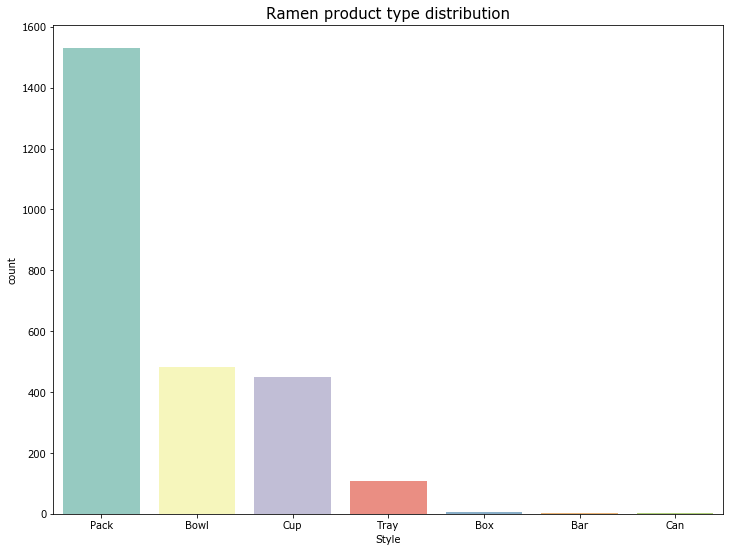

In [110]:
sns.set_palette('Set3')
plt.rcParams['font.family'] = 'Verdana'

plt.figure(figsize=(12,9))
order=df['Style'].value_counts().index
sns.countplot(data=df,x='Style', order=order)
plt.title('Ramen product type distribution', fontsize=15)
plt.show()

In [111]:
chicken=df.Variety.str.contains('chicken', case=False).value_counts()
beef=df.Variety.str.contains('beef', case=False).value_counts()
shrimp=df.Variety.str.contains('shrimp', case=False).value_counts()
pork=df.Variety.str.contains('pork', case=False).value_counts()
chili=df.Variety.str.contains('chili', case=False).value_counts()
oriental=df.Variety.str.contains('oriental', case=False).value_counts()
d={'chicken':chicken, 'beef':beef, 'shrimp':shrimp, 'pork':pork, 'chili':chili, 'oriental':oriental}
df_Variety = pd.DataFrame(data=d)

In [112]:
df_Variety['other'] = ~df_Variety.sum(axis=1) + 2580

In [113]:
df_Variety

,chicken,beef,shrimp,pork,chili,oriental,other
False,2252,2348,2451,2478,2549,2522,-12021
True,328,232,129,102,31,58,1699


In [114]:
df_Variety.drop([0], inplace=True)
df_Variety=df_Variety.transpose()

In [115]:
df_Variety.reset_index(level=0, inplace=True)

In [116]:
df_Variety.rename(columns={'index':'Flavor', True:'Amount'}, inplace=True)

In [117]:
df_Variety

,Flavor,Amount
0,chicken,328
1,beef,232
2,shrimp,129
3,pork,102
4,chili,31
5,oriental,58
6,other,1699


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
Brand      2580 non-null object
Variety    2580 non-null object
Style      2578 non-null object
Country    2580 non-null object
Stars      2580 non-null object
Top Ten    41 non-null object
dtypes: object(6)
memory usage: 121.1+ KB


In [119]:
df_Variety.sort_values('Amount', ascending=False, inplace=True)

In [120]:
df_Variety

,Flavor,Amount
6,other,1699
0,chicken,328
1,beef,232
2,shrimp,129
3,pork,102
5,oriental,58
4,chili,31


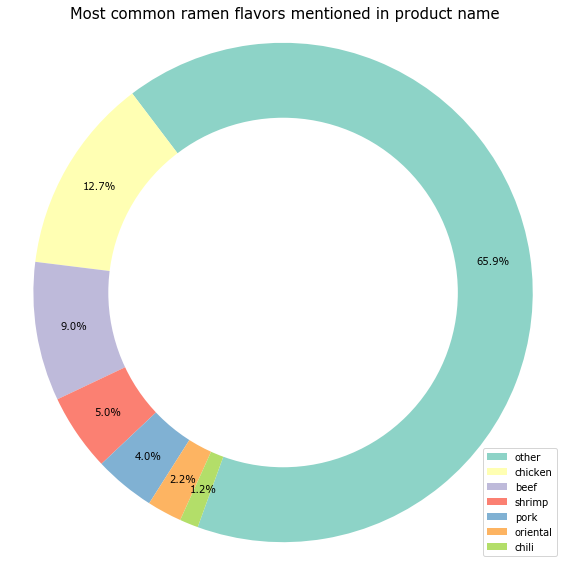

In [121]:
labels = df_Variety['Flavor']
values = df_Variety['Amount']

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(values, startangle=-110, autopct='%1.1f%%', pctdistance=0.85)
plt.legend(labels, loc=4)
plt.title('Most common ramen flavors mentioned in product name', fontsize=15)
circle = plt.Circle((0,0), 0.70, fc='#ffffff')
fig1 = plt.gcf()
fig1.gca().add_artist(circle)
ax.axis('equal')
plt.tight_layout()
plt.show()

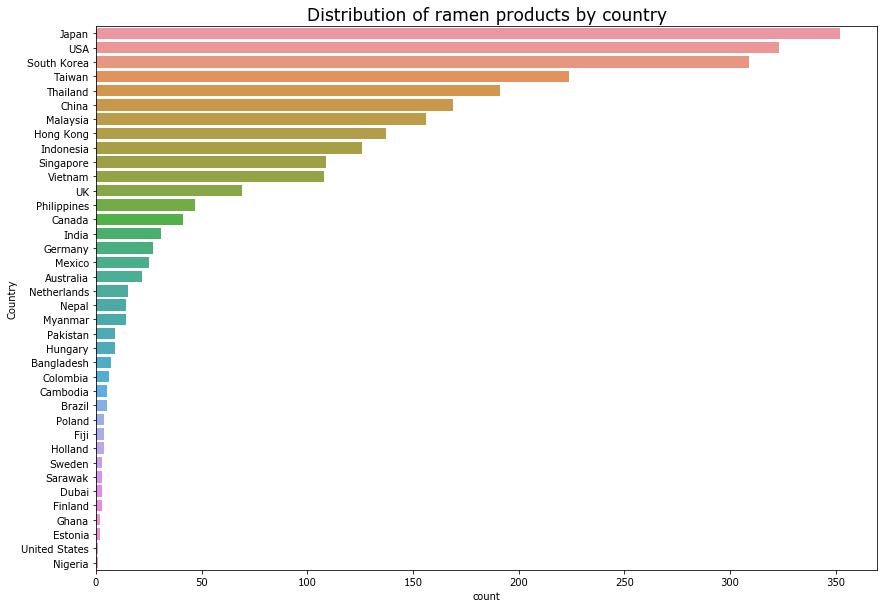

In [122]:
plt.figure(figsize=(14,10))

order=df['Country'].value_counts().index
sns.countplot(data=df, y='Country', order=order)
plt.title('Distribution of ramen products by country', fontsize=17)
plt.show()

In [123]:
df.loc[(df.Stars == 'Unrated'),'Stars']=0

In [124]:
df.Stars=df.Stars.astype('float')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
Brand      2580 non-null object
Variety    2580 non-null object
Style      2578 non-null object
Country    2580 non-null object
Stars      2580 non-null float64
Top Ten    41 non-null object
dtypes: float64(1), object(5)
memory usage: 121.1+ KB


In [126]:
df['Brand'].value_counts().head(10)

Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     52
Ottogi            46
Vina Acecook      34
Name: Brand, dtype: int64

In [127]:
df_brands = df.groupby('Brand', as_index=False)['Stars'].mean()

In [128]:
df_brands = df_brands[(df_brands['Brand'].str.match('Nissin')) |
          (df_brands['Brand'].str.match('Nongshim')) |
          (df_brands['Brand'].str.match('Maruchan')) |
          (df_brands['Brand'].str.match('Mama')) |
          (df_brands['Brand'].str.match('Paldo')) |
          (df_brands['Brand'].str.match('Myojo')) |
          (df_brands['Brand'].str.match('Indomie')) |
          (df_brands['Brand'].str.match('Samyang Foods')) |
          (df_brands['Brand'].str.match('Ottogi')) |
          (df_brands['Brand'].str.match('Vina Acecook'))
         ]

In [129]:
df_brands

,Brand,Stars
110,Indomie,4.070755
157,Mama,3.628873
158,Mama Pat's,3.687500
160,Maruchan,3.554276
183,Myojo,3.801587
192,Nissin,3.918570
195,Nongshim,4.000000
206,Ottogi,3.320652
208,Paldo,4.018939
209,Paldo Vina,2.583333


In [130]:
df_brands.drop(df.index[[158,209]], inplace=True)

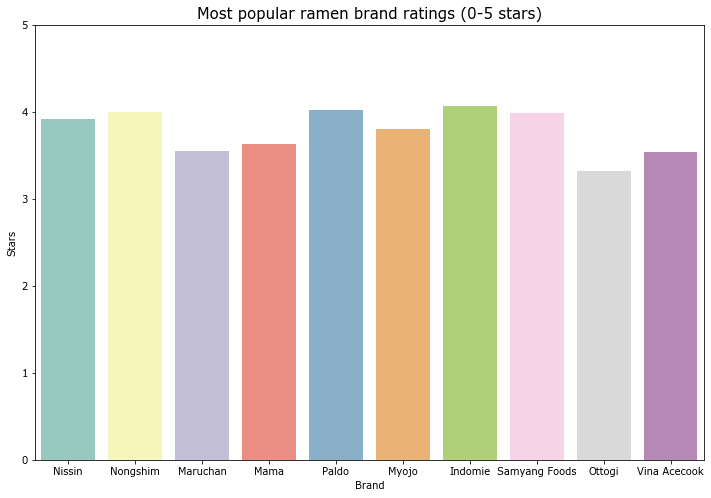

In [131]:
plt.figure(figsize=(12,8))

df_brands = df_brands.sort_values(by='Stars', ascending=False)

order=df['Brand'].value_counts().head(10).index
sns.barplot(data=df_brands, x='Brand', y='Stars', order=order)
plt.title('Most popular ramen brand ratings (0-5 stars)', fontsize=15)
plt.yticks([0, 1, 2, 3, 4, 5])
plt.show()